<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/Decision_Tree_interhshala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
data = pd.read_csv('/content/churn_prediction_simple.csv')

In [ ]:
X = data.drop(columns=['churn','customer_id'])
y = data['churn']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X,y, test_size=0.2, stratify = y)

model building and prediction

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight = 'balanced')
classifier = DTC()

In [ ]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [ ]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      3559
           1       0.43      0.44      0.44       855

    accuracy                           0.78      4414
   macro avg       0.65      0.65      0.65      4414
weighted avg       0.78      0.78      0.78      4414



In [ ]:
pwd

'/content'

visualizing decision tree

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier, out_file = 'tree_viz',
                max_depth=None, feature_names= X.columns, label = None, impurity = False)

In [ ]:
from graphviz import render
render( filepath='tree_viz', format = 'png', engine='neato')

'tree_viz.png'

hyperparameter tuning

In [ ]:
classifier = DTC()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

max depth

In [ ]:
from sklearn.metrics import f1_score
def cal_score(model, x1, y1, x2, y2 ):
  model.fit(x1,y1)
  predict = model.predict(x1)
  f1 = f1_score(y1,predict)
  predict = model.predict(x2)
  f2 = f1_score(y2,predict)
  return f1, f2

In [ ]:
# purpose of this function is to simply display the effect of the values on the train set and the test set.
def effect(train_score, test_score, x_axis, title):
  plt.figure(figsize=(5,5), dpi=120)
  plt.plot(x_axis, train_score, color='red', label='train_score')
  plt.plot(x_axis, test_score, color='blue', label='test_score')
  plt.title(title)
  plt.legend()
  plt.xlabel('parameter value')
  plt.ylabel('f1 score')
  plt.show()

In [ ]:
maxdepth = [i for i in range(1,50)]
train = []
test = []
for i in maxdepth:
  model = DTC(class_weight='balanced', max_depth=i, random_state=42)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test )
  train.append(f1)
  test.append(f2)

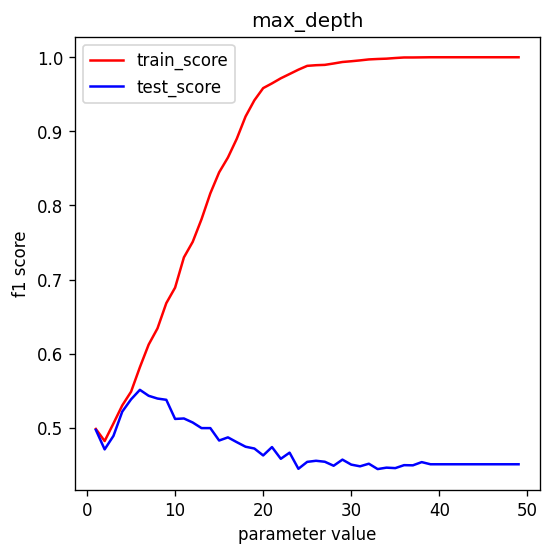

In [ ]:
effect(train, test, range(1,50), 'max_depth')

minimun sample split

In [ ]:
# by increasing the value of min_split, we can prevent trees from splitting too much and thereby we can prevent overfitting as well.
min_samples = [i for i in range(2,5000,25)]
train = []
test = []
for i in min_samples:
  model = DTC(class_weight='balanced', min_samples_split=i, random_state=42)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

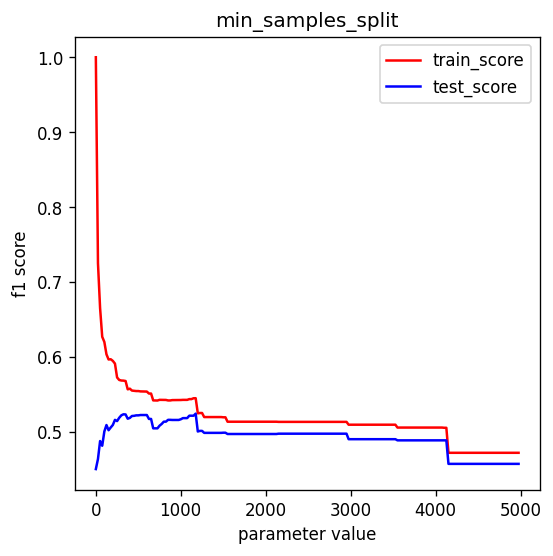

In [ ]:
effect(train, test, range(2,5000,25), 'min_samples_split')

max leaf nodes

In [ ]:
# if after splitting, the number of terminal nodes are more than the number of specified leaf nodes, the splitting would stop.
min_samples = [i for i in range(2,200,10)]
train = []
test = []
for i in min_samples:
  model = DTC(class_weight='balanced', max_leaf_nodes=i, random_state=42)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

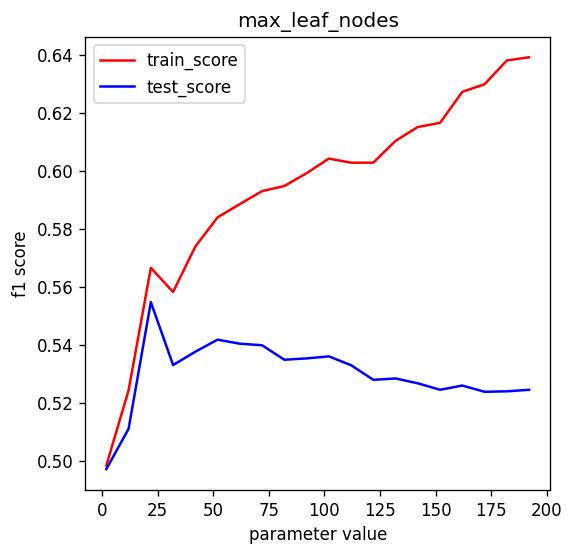

In [ ]:
effect(train, test, range(2,200,10), 'max_leaf_nodes')
# When both train f1 score and test f1 score are less, it is underfitting.
# When the train f1 score is very much higher than the test f1 score, the model is overfitting.



min sample leaf

In [ ]:
# this parameter specifies the number of samples that should be present in the leaf node after splitting.
# if this parameter value increases, it helps in preventing overfitting.
min_samples = [i for i in range(2,4000,25)]
train = []
test = []
for i in min_samples:
  model = DTC(class_weight='balanced', min_samples_leaf=i, random_state=42)
  f1, f2 = cal_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

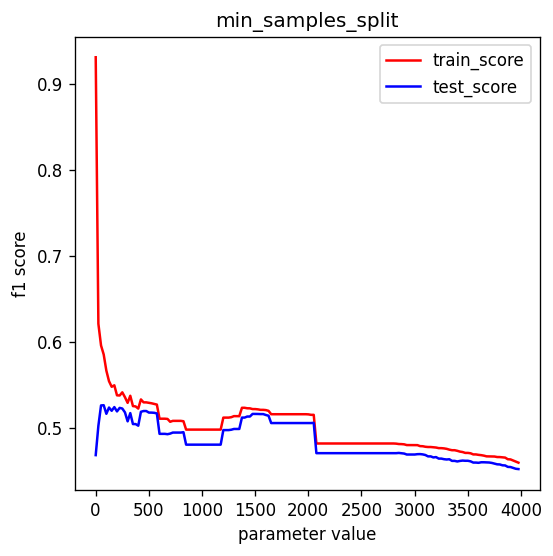

In [ ]:
effect(train, test, range(2,4000,25), 'min_samples_split')

In [ ]:
# training our model one last time to see which parameters helped more in prediction, i.e, in splitting of the nodes.
model = DTC(max_depth=9)
model.fit(x_train,y_train)
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()
k

gender                            0.002117
dependents                        0.002547
occupation                        0.007315
customer_nw_category              0.007927
city                              0.012417
days_since_last_transaction       0.015071
age                               0.016283
previous_month_end_balance        0.019013
current_month_balance             0.019794
previous_month_credit             0.024388
branch_code                       0.026562
vintage                           0.028549
current_month_credit              0.032236
average_monthly_balance_prevQ2    0.043354
previous_month_debit              0.044269
previous_month_balance            0.057143
average_monthly_balance_prevQ     0.086522
current_month_debit               0.086564
current_balance                   0.467930
dtype: float64

Text(0.5, 1.0, 'feature_importance')

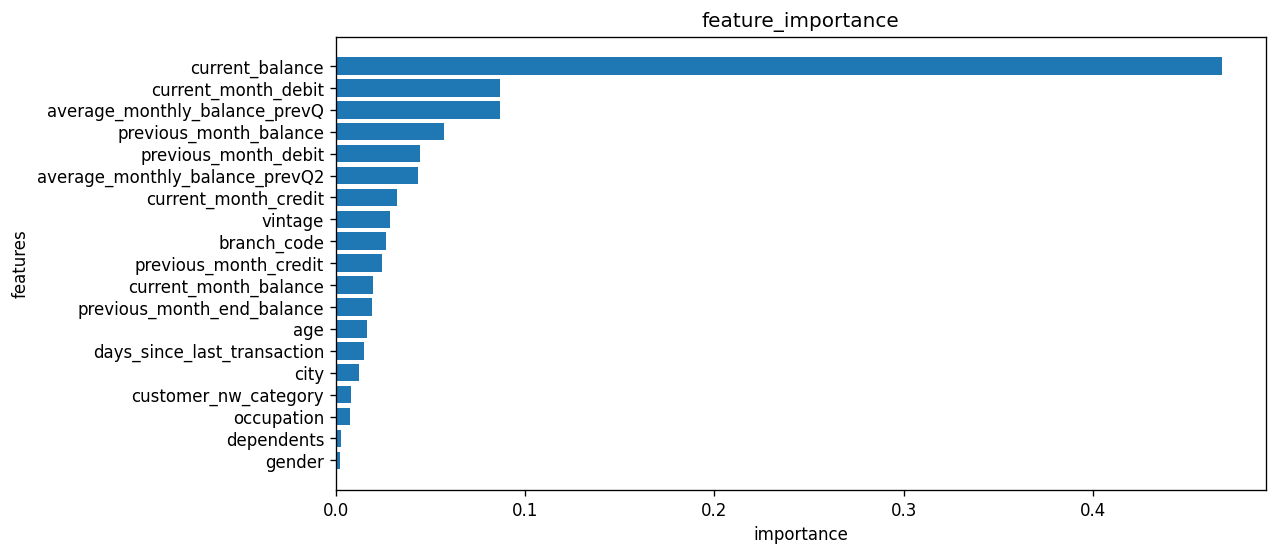

In [ ]:
plt.figure(figsize=(10,5), dpi=120)
plt.barh(k.index, k)
plt.xlabel('importance')
plt.ylabel('features')
plt.title('feature_importance')
# we can see from the graph , which feature contributed how much.